----
# <center> **RUBEN ADRIAN BAQUEL - APRENDIZAJE SUPERVISADO**
-----

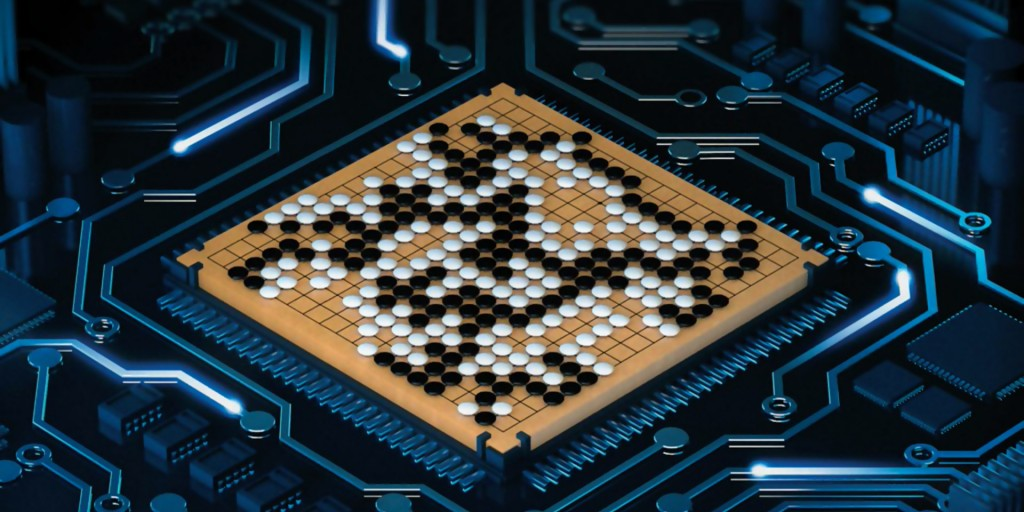

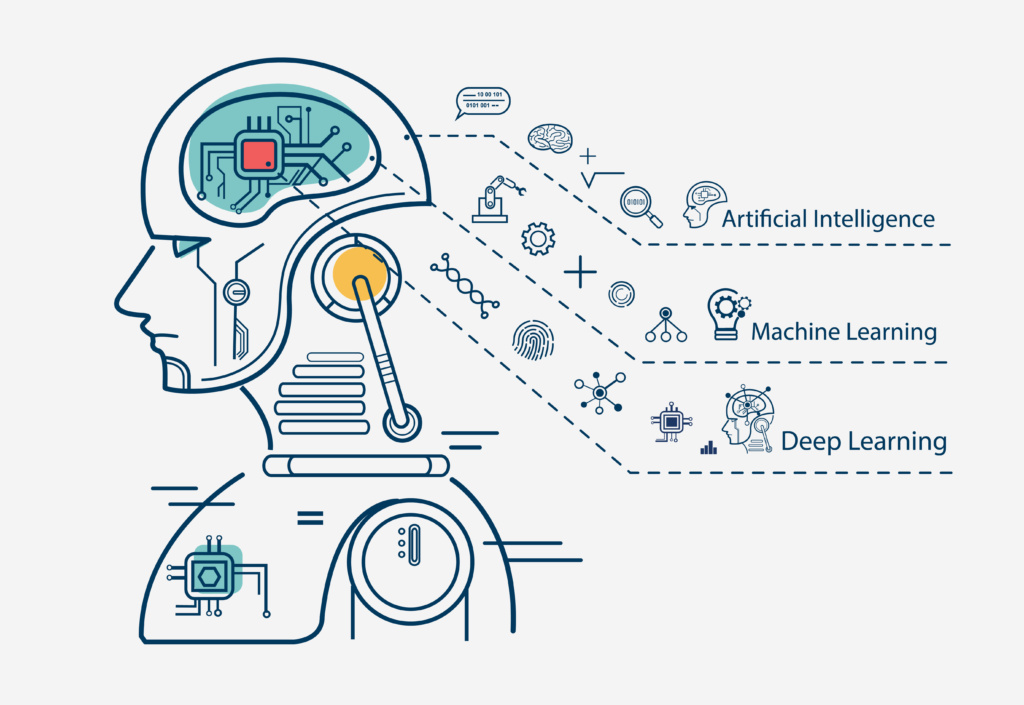

# Actividad 2: Validación y evaluación en regresión y clasificación

Esta segunda actividad consiste en demostrar los conocimientos sobre validación y evaluación de algoritmos en aprendizaje supervisado, haciendo uso de los conceptos aprendidos en la asignatura.

Información general:
* La entrega consistirá en un archivo .ipynb siguiendo las instrucciones de este notebook.
* 60% de la nota final.

Instrucciones para cumplimentar el notebook:
* Descarga este notebook, que servirá como base para la entrega.
* **No hay que modificar las celdas** que vienen en la hoja de actividades, **a no ser que se especifique claramente en la celda**. Para contestar a las preguntas, por favor añade celdas inmediatamente después de cada pregunta.
* Para la nota se valorará tanto la consecución de la respuesta adecuada como el estilo y adecuación del código fuente (si procede responder con código), así como la inclusión de comentarios apropiados.
* **No está permitido compartir los resultados de una actividad** en el foro o con cualquier compañero, **salvo indicación expresa en el enunciado de la actividad**. Hacerlo puede suponer suspender la asignatura y enfrentarse a medidas disciplinarias.

Información útil:
* Para crear celdas en el notebook, usa el botón "+" del menú situado en la esquina superior izquierda.
* Para ejecutar una celda (texto o código), pulsa el botón "Run" del menú situado en la esquina superior izquierda.
* Recuerda cambiar el tipo de celda de forma adecuada con el menú superior.
* Más información sobre notebooks en la documentación oficial: https://jupyter.readthedocs.io/en/latest/

### Ejercicio 1 (1.5 puntos)

Cree un programa que permita visualizar una gráfica en la que se muestren los valores de error MAE del regresor DummyRegressor en función del porcentaje de split training/test en validación Hold-out (pruebe desde un 50%-50% hasta un 95%-5%, de 5% en 5%) para un dataset de regresión (el que se desee).

In [4]:
###############################################################################
####### IMPORTAMOS EL CONJUNTO DE LBRERIAS A UTILIZAR ##################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_boston
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [ ]:
################################################################################
############ CARGAMOS EL DATASET BOSTON ########################################
dataset = load_boston()

In [ ]:
print(dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
################################################################################
###### CARGAMOS EL DATASET COMO UN DATA FRAME CON FINES VISUALES ###############
df = pd.DataFrame(data = dataset.data, columns= dataset.feature_names)
df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


In [ ]:
################################################################################
########## CONSTRUCCION DEL ALGORITMO DE APRENDIZAJE ###########################
dr = DummyRegressor()

In [ ]:
## Tamaño del test_size:
nsize = [0.05,0.10,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5] 

In [ ]:
################################################################################
####### CARACTERISTICAS DEL TEST y TRAINING SEGUN test_size ####################
for i in nsize:
  X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size = i, random_state= 42)
  print("test size:",i*100,'%')
  print("training: %d instancias y %d atributos" % (X_train.data.shape[0], X_train.data.shape[1]))
  print("testing: %d instancias y %d atributos" % (X_test.data.shape[0], X_test.data.shape[1]))
  print("\n")
  

test size: 5.0 %
training: 480 instancias y 13 atributos
testing: 26 instancias y 13 atributos


test size: 10.0 %
training: 455 instancias y 13 atributos
testing: 51 instancias y 13 atributos


test size: 15.0 %
training: 430 instancias y 13 atributos
testing: 76 instancias y 13 atributos


test size: 20.0 %
training: 404 instancias y 13 atributos
testing: 102 instancias y 13 atributos


test size: 25.0 %
training: 379 instancias y 13 atributos
testing: 127 instancias y 13 atributos


test size: 30.0 %
training: 354 instancias y 13 atributos
testing: 152 instancias y 13 atributos


test size: 35.0 %
training: 328 instancias y 13 atributos
testing: 178 instancias y 13 atributos


test size: 40.0 %
training: 303 instancias y 13 atributos
testing: 203 instancias y 13 atributos


test size: 45.0 %
training: 278 instancias y 13 atributos
testing: 228 instancias y 13 atributos


test size: 50.0 %
training: 253 instancias y 13 atributos
testing: 253 instancias y 13 atributos




In [ ]:
###############################################################################
########### MAE PARA EL TEST SEGUN SIZE #######################################
eam = []
for i in nsize:
  X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size = i, random_state= 42)
  dr.fit(X_train, y_train)
  y_pred = dr.predict(X_test)
  mae = mean_absolute_error(y_test, y_pred)
  print("test size:", i*100,'%')
  print("MAE: %.2f" % mae)
  eam.append(mae)
  print("\n") 

test size: 5.0 %
MAE: 6.68


test size: 10.0 %
MAE: 5.75


test size: 15.0 %
MAE: 5.95


test size: 20.0 %
MAE: 6.26


test size: 25.0 %
MAE: 6.22


test size: 30.0 %
MAE: 6.53


test size: 35.0 %
MAE: 6.38


test size: 40.0 %
MAE: 6.58


test size: 45.0 %
MAE: 6.72


test size: 50.0 %
MAE: 6.54




In [ ]:
###############################################################################
########### MAE PARA EL TRAINING SEGUN test_size ##############################
eam2 = []
for i in nsize:
  X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size = i, random_state= 42)
  dr.fit(X_train, y_train)
  y_pred = dr.predict(X_train)
  mae = mean_absolute_error(y_train, y_pred)
  print("training size:" ,i*100, '%')
  print("MAE: %.2f" % mae)
  eam2.append(mae)
  print("\n")

training size: 5.0 %
MAE: 6.67


training size: 10.0 %
MAE: 6.78


training size: 15.0 %
MAE: 6.80


training size: 20.0 %
MAE: 6.81


training size: 25.0 %
MAE: 6.89


training size: 30.0 %
MAE: 6.84


training size: 35.0 %
MAE: 6.93


training size: 40.0 %
MAE: 6.90


training size: 45.0 %
MAE: 6.67


training size: 50.0 %
MAE: 6.83




In [ ]:
size = np.array([5,10,15,20,25,30,35,40,45,50])

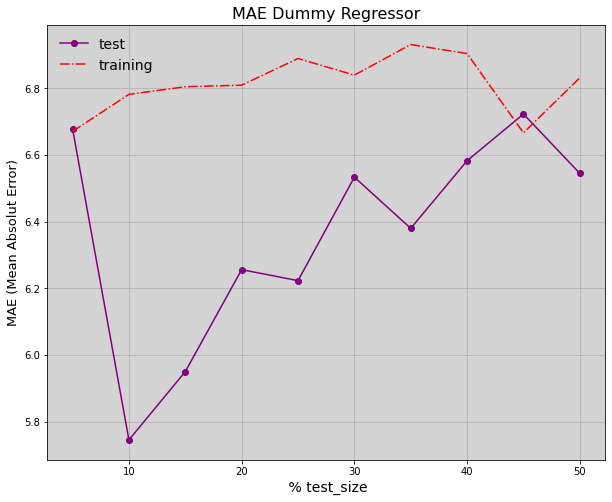

In [ ]:
################################################################################
##### PLOT MAE DUMMY REGRESSOR ################################################
plt.figure(figsize=(10,8))
ax = plt.axes()
plt.plot(size, eam, '-o', color='purple', label = 'test')
plt.plot(size,eam2, '-.', color='r', label = 'training')
plt.title("MAE Dummy Regressor", fontsize= 16)
plt.legend(loc='best', frameon = False, fontsize = 14)
plt.xlabel(' % test_size', fontsize=14)
plt.ylabel('MAE (Mean Absolut Error)', fontsize=13)
plt.grid()
ax.set_facecolor('lightgray')
plt.show()

### Ejercicio 2 (1.5 puntos)

Realizar el mismo procedimiento que el descrito en el Ejercicio 1, pero para clasificación con el clasificador DummyClassifier (visualizar gráfica de valores de exactitud, en lugar de MAE).

In [ ]:
###############################################################################
####### IMPORTAMOS EL CONJUNTO DE LBRERIAS A UTILIZAR #########################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [ ]:
################################################################################
############ CARGAMOS EL DATASET IRIS ########################################
iris = load_iris()

In [ ]:
################################################################################
########## CONSTRUCCION DEL ALGORITMO DE APRENDIZAJE ###########################
clf = DummyClassifier()

In [ ]:
nsize = [0.05,0.10,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5]

In [ ]:
seed = 42

In [ ]:
################################################################################
####### CARACTERISTICAS DEL TEST y TRAINING SEGUN test_size ####################

seed = 42

for i in nsize:
  X_train1, X_test1, y_train1 , y_test1 = train_test_split(iris.data, iris.target, test_size = i, random_state= seed)
  print("test size:",i*100,'%')
  print("training: %d instancias y %d atributos" %(X_train1.data.shape[0], X_train1.data.shape[1]))
  print("testing: %d instancias y %d atributos" %(X_test1.data.shape[0], X_test1.data.shape[1]))
  print("\n")

test size: 5.0 %
training: 142 instancias y 4 atributos
testing: 8 instancias y 4 atributos


test size: 10.0 %
training: 135 instancias y 4 atributos
testing: 15 instancias y 4 atributos


test size: 15.0 %
training: 127 instancias y 4 atributos
testing: 23 instancias y 4 atributos


test size: 20.0 %
training: 120 instancias y 4 atributos
testing: 30 instancias y 4 atributos


test size: 25.0 %
training: 112 instancias y 4 atributos
testing: 38 instancias y 4 atributos


test size: 30.0 %
training: 105 instancias y 4 atributos
testing: 45 instancias y 4 atributos


test size: 35.0 %
training: 97 instancias y 4 atributos
testing: 53 instancias y 4 atributos


test size: 40.0 %
training: 90 instancias y 4 atributos
testing: 60 instancias y 4 atributos


test size: 45.0 %
training: 82 instancias y 4 atributos
testing: 68 instancias y 4 atributos


test size: 50.0 %
training: 75 instancias y 4 atributos
testing: 75 instancias y 4 atributos




In [ ]:
###############################################################################
################### EXACTITUD TEST ############################################
eval = []

for i in nsize:
  X_train1, X_test1, y_train1 , y_test1 = train_test_split(iris.data, iris.target, test_size = i, random_state= seed)
  clf.fit(X_train1,y_train1)
  y_prede = clf.predict(X_test1)
  score = clf.score(y_test1, y_prede)

  print("test size", i*100,'%')
  print("Exactitud test:", round(score*100,2),'%')
  eval.append(score*100)
  print('\n')

test size 5.0 %
Exactitud test: 25.0 %


test size 10.0 %
Exactitud test: 46.67 %


test size 15.0 %
Exactitud test: 34.78 %


test size 20.0 %
Exactitud test: 33.33 %


test size 25.0 %
Exactitud test: 28.95 %


test size 30.0 %
Exactitud test: 40.0 %


test size 35.0 %
Exactitud test: 45.28 %


test size 40.0 %
Exactitud test: 28.33 %


test size 45.0 %
Exactitud test: 39.71 %


test size 50.0 %
Exactitud test: 44.0 %




/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


In [ ]:
###############################################################################
################### EXACTITUD TRAINING ########################################
eval1 = []

for i in nsize:
  X_train1, X_test1, y_train1 , y_test1 = train_test_split(iris.data, iris.target, test_size = 1- i, random_state= seed)
  clf.fit(X_train1,y_train1)
  y_prede = clf.predict(X_train1)
  score = clf.score(y_train1, y_prede)
  print("training size", i*100,'%')
  print("Exactitud:", round(score*100,2),'%')
  eval1.append(score*100)
  print('\n')

training size 5.0 %
Exactitud: 14.29 %


training size 10.0 %
Exactitud: 46.67 %


training size 15.0 %
Exactitud: 59.09 %


training size 20.0 %
Exactitud: 26.67 %


training size 25.0 %
Exactitud: 40.54 %


training size 30.0 %
Exactitud: 26.67 %


training size 35.0 %
Exactitud: 46.15 %


training size 40.0 %
Exactitud: 33.33 %


training size 45.0 %
Exactitud: 38.81 %


training size 50.0 %
Exactitud: 37.33 %




/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


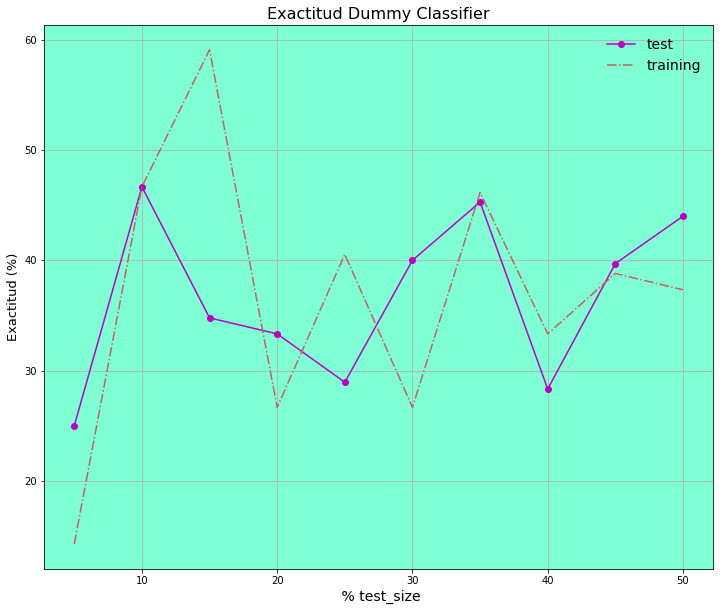

In [ ]:
################################################################################
##### PLOT EXACTITUD DUMMY CLASSIFIER #########################################
plt.figure(figsize=(12,10))
ax = plt.axes()
plt.plot(size, eval, '-o', color='m', label = 'test')
plt.plot(size,eval1, '-.', color='indianred', label = 'training')
plt.title("Exactitud Dummy Classifier", fontsize= 16)
plt.legend(loc='best', frameon = False, fontsize = 14)
plt.xlabel(' % test_size', fontsize= 14)
plt.ylabel('Exactitud (%)', fontsize= 13)
plt.grid()
ax.set_facecolor('aquamarine')
plt.show()

### Ejercicio 3 (2 puntos)

Cree un programa, con comentarios que aclaren el código, donde se computen las métricas MAE, RMSE y MAPE usando los regresores OLS y KNN en validación cruzada con 10 bolsas. Muestre los resultados de forma comparativa para al menos tres datasets (los que se deseen).

In [2]:
###############################################################################
####### IMPORTAMOS EL CONJUNTO DE LBRERIAS A UTILIZAR #########################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from math import sqrt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

from sklearn.datasets import fetch_california_housing
from sklearn.datasets import load_boston
from sklearn.datasets import load_diabetes

In [6]:
################################################################################
############ CARGAMOS LOS DATASETS A UTILIZAR #################################

housing = fetch_california_housing()
boston = load_boston()
diabetes = load_diabetes()

In [8]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [9]:
################################################################################
###### CARGAMOS CADA DATASET COMO UN DATA FRAME CON FINES VISUALES #############
df = pd.DataFrame(data= housing.data, columns= housing.feature_names)
df.head(3)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24


In [10]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [11]:
data = pd.DataFrame(data= boston.data, columns=boston.feature_names)
data.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


In [12]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [13]:
dbt = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
dbt.head(3)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930


In [14]:
################################################################################
########## CONSTRUCCION DEL ALGORITMO DE APRENDIZAJE ###########################
lr = LinearRegression()

In [15]:
###############################################################################
########### Metricas de Evaluacion ############################################

metricas = {
    'MAE': mean_absolute_error,
    'RMSE': lambda y, y_pred:
    sqrt(mean_squared_error(y,y_pred)),
    'MAPE': lambda y, y_pred:
    np.mean(np.abs((y - y_pred)/y))*100
}

In [16]:
seed = 42

In [17]:
###############################################################################
############ VALIDACION Y PREDICCIONES ########################################
y_pred = cross_val_predict(lr, housing.data, housing.target,
                           cv = KFold(n_splits=10, random_state=seed, shuffle=False))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [18]:
y_pred2 = cross_val_predict(lr, boston.data, boston.target,
                            cv = KFold(n_splits=10, random_state=seed))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [19]:
y_pred3 = cross_val_predict(lr, diabetes.data, diabetes.target,
                            cv = KFold(n_splits=10, random_state=seed))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [20]:
# Metricas California housing:
MAE = metricas['MAE'](housing.target, y_pred)
RSME = metricas['RMSE'](housing.target, y_pred)
MAPE = metricas['MAPE'](housing.target, y_pred)

In [21]:
# Metricas Boston housing:
MAE2 = metricas['MAE'](boston.target, y_pred2)
RSME2 = metricas['RMSE'](boston.target, y_pred2)
MAPE2 = metricas['MAPE'](boston.target, y_pred2)

In [22]:
# Metricas Diabetes:
MAE3 = metricas['MAE'](diabetes.target, y_pred3)
RSME3 = metricas['RMSE'](diabetes.target, y_pred3)
MAPE3 = metricas['MAPE'](diabetes.target, y_pred3)

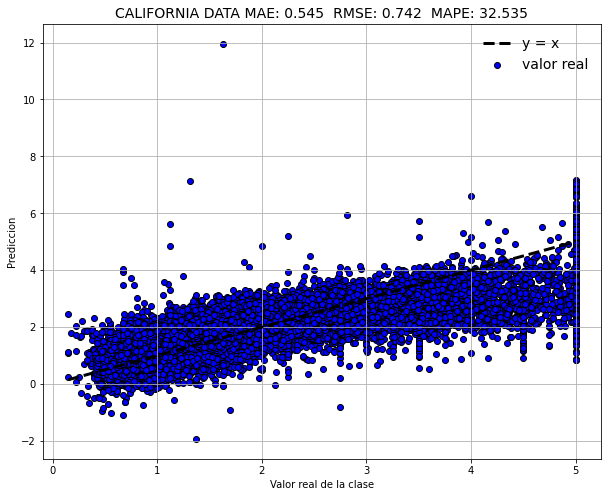

In [23]:
# Graficamos la prediccion vs datos reales:
# California DataSet

fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(housing.target, y_pred, color = 'blue',edgecolors=(0,0,0),label = 'valor real')
ax.plot([housing.target.min(), housing.target.max()],
        [housing.target.min(), housing.target.max()], 'k--', linewidth=3, label = 'y = x')  # La linea no es el modelo: es y = x
ax.set_xlabel('Valor real de la clase')
ax.set_ylabel('Prediccion')
plt.legend(loc='best', frameon = False, fontsize = 14)
plt.title('CALIFORNIA DATA MAE: %.3f  RMSE: %.3f  MAPE: %.3f' % (MAE,RSME, MAPE),fontsize = 14)
plt.grid()
plt.show()

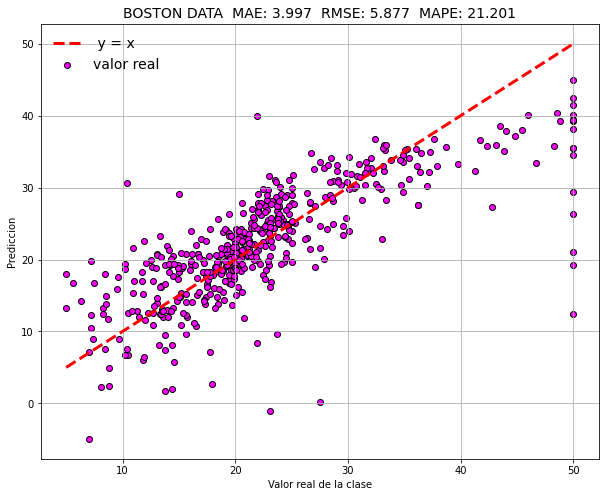

In [24]:
# Graficamos la prediccion vs datos reales:
# Boston DataSet:

fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(boston.target, y_pred2, color = 'magenta',edgecolors=(0,0,0),label = 'valor real')
ax.plot([boston.target.min(), boston.target.max()],
        [boston.target.min(), boston.target.max()], 'r--', linewidth=3, label = ' y = x')  # La linea no es el modelo: es y = x
ax.set_xlabel('Valor real de la clase')
ax.set_ylabel('Prediccion')
plt.legend(loc='best', frameon = False, fontsize = 14)
plt.title('BOSTON DATA  MAE: %.3f  RMSE: %.3f  MAPE: %.3f' % (MAE2,RSME2, MAPE2),fontsize = 14)
plt.grid()
plt.show()

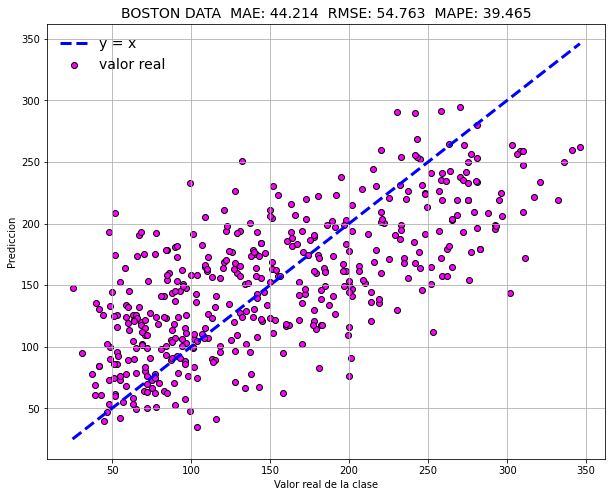

In [25]:
# Graficamos la prediccion vs datos reales:
# Diabetes DataSet:

fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(diabetes.target, y_pred3, color = 'fuchsia',edgecolors=(0,0,0),label = 'valor real')
ax.plot([diabetes.target.min(), diabetes.target.max()],
        [diabetes.target.min(), diabetes.target.max()], 'b--', linewidth=3, label = 'y = x')  # La linea no es el modelo: es y = x
ax.set_xlabel('Valor real de la clase')
ax.set_ylabel('Prediccion')
plt.legend(loc='best', frameon = False, fontsize = 14)
plt.title('BOSTON DATA  MAE: %.3f  RMSE: %.3f  MAPE: %.3f' % (MAE3,RSME3, MAPE3), fontsize = 14)
plt.grid()
plt.show()

In [26]:
table = pd.DataFrame({'MAE': MAE , 'RSME': RSME,'MAPE': MAPE}, index=['data_california'])

In [27]:
table = pd.DataFrame({'MAE': MAE2 , 'RSME': RSME2,'MAPE': MAPE2}, index=['data_boston']).append(table, ignore_index=False)

In [28]:
table = pd.DataFrame({'MAE': MAE3 , 'RSME': RSME3,'MAPE': MAPE3}, index=['data_diabetes']).append(table, ignore_index=False)
print("EVALUACION ALGORITMO OLS:")
print('\n')
table

EVALUACION ALGORITMO OLS:




,MAE,RSME,MAPE
data_diabetes,44.214396,54.763421,39.465002
data_boston,3.997306,5.877045,21.201154
data_california,0.544521,0.742262,32.534784


In [29]:
###############################################################################
############### CLASE PARA ESTANDARIZAR LOS DATOS #############################
ss = StandardScaler()

In [30]:
###############################################################################
########## ESTANDARIZAMOS LOS DATASETS ########################################
housing_ss = ss.fit_transform(housing.data)
boston_ss = ss.fit_transform(boston.data)
diabetes_ss = ss.fit_transform(diabetes.data)

In [31]:
###############################################################################
########## ALGORITMO KNEIGHBORS CON 10 VECINOS  Y DISTANCIA Minkowski #########
seed = 42
k = 10
knn = KNeighborsRegressor(n_neighbors= k,p = 1)

In [32]:
################################################################################
######## VALIDACION Y PREDICCIONES ############################################
y_predd = cross_val_predict(knn, housing_ss, housing.target,
                           cv = KFold(n_splits=10, random_state=seed, shuffle=False))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [33]:
y_predd2 = cross_val_predict(knn,boston_ss, boston.target,
                           cv = KFold(n_splits=10, random_state=seed, shuffle=False))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [34]:
y_predd3 = cross_val_predict(knn, diabetes_ss, diabetes.target,
                           cv = KFold(n_splits=10, random_state=seed, shuffle=False))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [35]:
# Metricas California housing:
MAE_1 = metricas['MAE'](housing.target, y_predd)
RSME_1 = metricas['RMSE'](housing.target, y_predd)
MAPE_1 = metricas['MAPE'](housing.target, y_predd)

In [36]:
# Metricas Boston:
MAE_2 = metricas['MAE'](boston.target, y_predd2)
RSME_2 = metricas['RMSE'](boston.target, y_predd2)
MAPE_2 = metricas['MAPE'](boston.target, y_predd2)

In [37]:
# Metricas Diabetes:
MAE_3 = metricas['MAE'](diabetes.target, y_predd3)
RSME_3 = metricas['RMSE'](diabetes.target, y_predd3)
MAPE_3 = metricas['MAPE'](diabetes.target, y_predd3)

In [38]:
table = pd.DataFrame({'MAE': MAE_1 , 'RSME': RSME_1,'MAPE': MAPE_1}, index=['data_california'])

In [39]:
table = pd.DataFrame({'MAE': MAE_2 , 'RSME': RSME_2,'MAPE': MAPE_2}, index=['data_boston']).append(table, ignore_index=False)

In [40]:
table = pd.DataFrame({'MAE': MAE_3 , 'RSME': RSME_3,'MAPE': MAPE_3}, index=['data_diabetes']).append(table, ignore_index=False)
print("EALUACION ALGORITMO KNN:")
table

EALUACION ALGORITMO KNN:


,MAE,RSME,MAPE
data_diabetes,46.923982,59.267339,40.708628
data_boston,3.616937,5.558297,17.699589
data_california,0.514215,0.725929,29.198003


### Ejercicio 4 (3 puntos)

Analice las diferencias entre los errores producidos por el algoritmo KNN en función de estos aspectos: a) número de vecinos más cercanos; b) función de distancia; c) con/sin normalización previa de atributos. Para ello, pruebe al menos dos configuraciones distintas de cada aspecto. Use tres datasets diferentes en validación leave-one-out en la comparativa de resultados.

In [41]:
###############################################################################
####### IMPORTAMOS EL CONJUNTO DE LBRERIAS A UTILIZAR #########################
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt

from sklearn.datasets import load_boston
from sklearn.datasets import load_diabetes
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.neighbors import KNeighborsRegressor

In [48]:
###############################################################################
########## FUNCIONES UTILIZADAS EN LA ASIGNATURA #############################

import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree
import graphviz


# Calculo de las metricas de evaluacion.
def evaluacion(y_true, y_pred, metricas):
    res = {}
    for nombre, funcion in metricas.items():
        res[nombre] = funcion(y_true, y_pred)
    return res

# Grafica de realidad -vs- prediccion.
def grafica_real_vs_pred(y_true, y_pred, metricas, algoritmo):
    fig, ax = plt.subplots()
    ax.scatter(y_true, y_pred, edgecolors=(0, 0, 0))
    ax.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=4)
    ax.set_xlabel('Valor real de la clase')
    ax.set_ylabel('Predicción')
    plt.title("%s\nMAE: %.3f  RMSE: %.3f  MAPE: %.3f  R2: %.3f" %
              (algoritmo,metricas['MAE'],metricas['RMSE'],metricas['MAPE'],metricas['R2']))
    plt.show()

# Grafica con mapa de regiones de clasificacion segun modelo ya entrenado que admita coef_ e intercept_.
def mapa_modelo_clasif_2d(X, y, modelo, metricas, algoritmo):
    # create a mesh to plot in
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    Z = modelo.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(20,16))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    plt.title("%s\nACC: %.3f  PREC: %.3f  RECALL: %.3f  F1: %.3f" %
              (algoritmo,metricas['ACC'],metricas['PREC'],metricas['RECALL'],metricas['F1']), fontsize=28)
    plt.axis('tight')

    # Plot also the training points
    colors = "bry"
    for i, color in zip(modelo.classes_, colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired,
                    edgecolor='black', s=20)

    # Plot the three one-against-all classifiers
    if (hasattr(modelo, 'coef_')):
        xmin, xmax = plt.xlim()
        ymin, ymax = plt.ylim()
        coef = modelo.coef_
        intercept = modelo.intercept_

        def plot_hyperplane(c, color):
            def line(x0):
                return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]

            plt.plot([xmin, xmax], [line(xmin), line(xmax)],
                     ls="--", color=color)

        for i, color in zip(modelo.classes_, colors):
            plot_hyperplane(i, color)

    plt.show()

# Visualizacion de modelo de tipo arbol.
def mostrar_modelo_arbol(modelo, datos, nombre_archivo = "modelo"):
    dot_data = tree.export_graphviz(modelo, out_file=None, feature_names=datos.feature_names,
                         class_names=datos.target_names, filled=True,
                         rounded=True, special_characters=True)

    graph = graphviz.Source(dot_data)
    graph.render(nombre_archivo, view=True)

## **Experimento #1 BOSTON** <br>
**KNN con Neighbors = 5; distancia=1 sin normalizacion**

In [42]:
## Carga de Data Set BOSTON:
boston = load_boston()

In [43]:
## Construccion del Algoritmo detallado:
knn_5 = KNeighborsRegressor(n_neighbors= 5, p = 1)

In [44]:
## Semilla:
seed = 42

In [45]:
###############################################################################
######### METRICAS DE EVALUACION ##############################################
metricas = {
    'MAE': mean_absolute_error,
    'RMSE': lambda y, y_pred:
    sqrt(mean_squared_error(y,y_pred)),
    'MAPE': lambda y, y_pred:
    np.mean(np.abs((y-y_pred) /y))*100,
  }

In [46]:
################################################################################
######### VALIDACION Y PREDICCIONES ############################################
y_p5 = cross_val_predict(knn_5, boston.data, boston.target, cv = KFold(n_splits= len(boston.data), random_state= seed))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [49]:
## Evaluacion y obtencion de Metricas:

eval1 = evaluacion(boston.target, y_p5, metricas)
print('')
print('BOSTON KNN(5) p=1 : ->',eval1)


BOSTON KNN(5) p=1 : -> {'MAE': 3.8002371541501976, 'RMSE': 5.544305770988235, 'MAPE': 18.024605295264312}


## **Experimento #2 BOSTON** <br>
**KNN con Neighbors = 10; distancia=2 y normalizacion de atributos.**

In [50]:
## Clase MinMaxScaler:
mms = MinMaxScaler()

In [51]:
## Normalizamos los atributos:
X_mms = mms.fit_transform(boston.data)

In [52]:
## Construccion del Algoritmo detallado:
knn_10 = KNeighborsRegressor(n_neighbors= 10, p = 2)

In [53]:
## Semilla:
seed = 42

In [54]:
y_p10 = cross_val_predict(knn_10, X_mms, boston.target, cv = KFold(n_splits= len(boston.data), random_state= seed))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [55]:
## Evaluacion y obtencion de Metricas:

eval10 = evaluacion(boston.target, y_p10, metricas)
print('')
print('BOSTON KNN(10) p=2 : ->',eval10)


BOSTON KNN(10) p=2 : -> {'MAE': 3.317430830039526, 'RMSE': 5.218856393438697, 'MAPE': 14.84995751385867}


## **Comparacion Boston**
----

In [56]:
print('BOSTON KNN(5)  p=1 : ->',eval1)
print('BOSTON KNN(10) p=2 : ->',eval10)

BOSTON KNN(5)  p=1 : -> {'MAE': 3.8002371541501976, 'RMSE': 5.544305770988235, 'MAPE': 18.024605295264312}
BOSTON KNN(10) p=2 : -> {'MAE': 3.317430830039526, 'RMSE': 5.218856393438697, 'MAPE': 14.84995751385867}


## **Experimento #3 DIABETES**
**KNN con Neighbors = 6; distancia=1 con normalizacion de atributos.**

In [57]:
###################################################
#### Metricas de Evaluacion #######################
metricas = {
    'MAE': mean_absolute_error,
    'RMSE': lambda y, y_pred:
    sqrt(mean_squared_error(y,y_pred)),
    'MAPE': lambda y, y_pred:
    np.mean(np.abs((y-y_pred) /y))*100,
  }

In [58]:
## Carga de Data Set DIABETES:
diabetes = load_diabetes()

In [63]:
## Clase MinMaxSaler para normalizar:
minm = MinMaxScaler()

In [64]:
X_dm = minm.fit_transform(diabetes.data)

In [65]:
## Construccion del Algoritmo detallado:
knn_6 = KNeighborsRegressor(n_neighbors= 6, p = 1)

In [66]:
seed = 42
y_pr6 = cross_val_predict(knn_6, X_dm, diabetes.target, cv = KFold(n_splits= len(diabetes.data), random_state= seed))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [67]:
## Evaluacion y obtencion de Metricas:

eval6 = evaluacion(diabetes.target, y_pr6, metricas)
print('DIABETES KNN(10) p=1 : ->',eval6)

DIABETES KNN(10) p=1 : -> {'MAE': 47.634992458521864, 'RMSE': 59.9173722994256, 'MAPE': 40.89664343477841}


## **Experimento #4 DIABETES**
**KNN con Neighbors = 3 ; distancia=2 con normalizacion de atributos.**

In [68]:
## Construccion del Algoritmo detallado:
knn_3 = KNeighborsRegressor(n_neighbors= 3, p = 2)

In [69]:
seed = 42
y_pr3 = cross_val_predict(knn_3, X_dm, diabetes.target, cv = KFold(n_splits= len(diabetes.data), random_state= seed))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [70]:
## Evaluacion y obtencion de Metricas:

eval3 = evaluacion(diabetes.target, y_pr3, metricas)
print('DIABETES KNN(3) p=2 : ->',eval3)

DIABETES KNN(3) p=2 : -> {'MAE': 49.573906485671195, 'RMSE': 64.52977027609326, 'MAPE': 42.48212075687397}


## **Comparacion Diabetes**
-----

In [71]:
print('DIABETES KNN(6) p=1 : ->',eval6)
print('DIABETES KNN(3) p=2 : ->',eval3)

DIABETES KNN(6) p=1 : -> {'MAE': 47.634992458521864, 'RMSE': 59.9173722994256, 'MAPE': 40.89664343477841}
DIABETES KNN(3) p=2 : -> {'MAE': 49.573906485671195, 'RMSE': 64.52977027609326, 'MAPE': 42.48212075687397}


## **Experimento #5 CALIFORNIA**
**KNN con Neighbors = 8; distancia=2 sin normalizacion de atributos.**

In [72]:
## Carga de Datos:
california = fetch_california_housing()

In [73]:
## Construccion del Algoritmo detallado:
knn_8 = KNeighborsRegressor(n_neighbors= 8, p = 2)

In [74]:
## Semilla y Validacion:
seed = 42
y_p8 = cross_val_predict(knn_8, california.data, california.target, cv = KFold(n_splits= len(california.data), random_state= seed))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [75]:
## Evaluacion y obtencion de Metricas:

eval8 = evaluacion(california.target, y_p8, metricas)
print('CALIFORNIA KNN(8) p=2 : ->',eval8)

CALIFORNIA KNN(8) p=2 : -> {'MAE': 0.8035769918846899, 'RMSE': 1.0416410239747778, 'MAPE': 52.09171662382275}


## **Experimento #6 CALIFORNIA**
**KNN con Neighbors = 4; distancia=1 sin normalizacion de atributos.**

In [76]:
## Construccion del Algoritmo detallado:
knn_4 = KNeighborsRegressor(n_neighbors= 4, p = 1)

In [77]:
## Semilla y Validacion:
seed = 42
y_p4 = cross_val_predict(knn_4, california.data, california.target, cv = KFold(n_splits= len(california.data), random_state= seed))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [78]:
## Evaluacion y obtencion de Metricas:

eval4 = evaluacion(california.target, y_p4, metricas)
print('CALIFORNIA KNN(4) p=1 : ->',eval4)

CALIFORNIA KNN(4) p=1 : -> {'MAE': 0.754104546996124, 'RMSE': 0.9931905379405618, 'MAPE': 47.661138752767904}


## **Comparacion California**

In [79]:
print('CALIFORNIA KNN(8) p=2 : ->',eval8)
print('CALIFORNIA KNN(4) p=1 : ->',eval4)

CALIFORNIA KNN(8) p=2 : -> {'MAE': 0.8035769918846899, 'RMSE': 1.0416410239747778, 'MAPE': 52.09171662382275}
CALIFORNIA KNN(4) p=1 : -> {'MAE': 0.754104546996124, 'RMSE': 0.9931905379405618, 'MAPE': 47.661138752767904}


### Ejercicio 5 (2 puntos)

Estudie la métrica para clasificación denominada AUC de scikit-learn y cree un programa, con comentarios que aclaren el código, donde se compute diche métrica (junto con exactitud, precisión, recall y F1) usando los clasificadores LOGR y CART en validación cruzada leave-one-out. Muestre los resultados de forma comparativa para al menos tres datasets (los que se deseen).

----
## **AREA BAJO LA CURVA ROC (ROC AUC)**
----

El Área Bajo la Curva permite medir la precisión de los modelo de clasificación. En el eje x se representa el Ratio de Falsos Positivos y el el eje y el Ratio de Verdaderos Positivos.

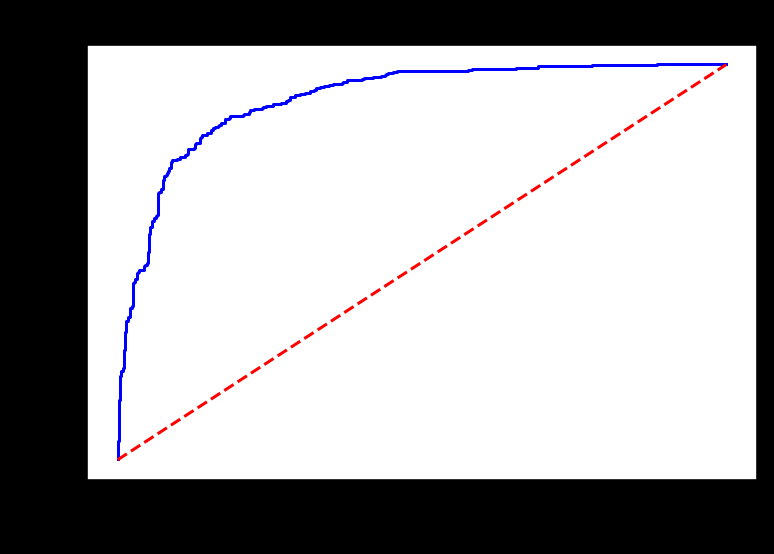

En **Machine Learning**, la medición del rendimiento es una tarea esencial. Entonces, cuando se trata de un problema de clasificación, podemos contar con una curva **AUC-ROC**. Esta es una de las métricas de evaluación más importante para verificar el rendimiento de cualquier modelo de clasificación.

**ROC** viene de las características de funcionamiento del receptor y AUC del área bajo la curva. 

La curva ROC nos dice qué tan bueno puede distinguir el modelo entre dos cosas, por ejemplo, si un paciente tiene cáncer o no. Mejores modelos pueden distinguir con precisión entre los dos, mientras que un modelo pobre tendrá dificultades para distinguir entre los dos.



In [88]:
###############################################################################
####### IMPORTAMOS EL CONJUNTO DE LBRERIAS A UTILIZAR #########################

import numpy as np 
import pandas as pd
from sklearn import datasets 
from sklearn import tree
from sklearn import preprocessing
import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
import graphviz

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [89]:
import warnings
warnings.filterwarnings('ignore')

## **EXPERIMENTO #1 DATASET (make_classification) usando Logistic Regression**
----

In [81]:
## Generamos Dataset #1 usando el modulo de scikit learn make_classification:

from sklearn.datasets import make_classification

X,y = make_classification(n_samples= 1500,
                          n_features= 10,
                          n_redundant = 0,
                          random_state = 42)

In [82]:
###############################################
########## Algoritmo de Aprendizaje ###########
seed = 42

logr1 = LogisticRegression(solver= 'sag', max_iter=1000, random_state= seed)

In [83]:
y1_pred = cross_val_predict(logr1, X, y, cv = KFold(n_splits=len(X), random_state= seed))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [84]:
## Metricas de Evaluacion:

metricas = {
    'ACC': metrics.accuracy_score,
    'PREC': lambda y_true , y_pred:
    metrics.precision_score(y_true, y_pred, average='micro'),
    'RECALL': lambda y_true,y_pred:
    metrics.recall_score(y_true,y_pred, average='micro'),
    'F1': lambda y_true,y_pred:
    metrics.f1_score(y_true,y_pred, average='micro')
}

In [85]:
################################################################################
####### EVALUACION Y MODELO ####################################################

eval_01 = evaluacion(y, y1_pred, metricas)
modelo_1 = logr1.fit(X, y)

In [86]:
################################################################################
##### MATRIZ DE CONFUSION Y METRICAS ###########################################

print('Matriz de Confusion (%s):\n%s' %('LOGR', metrics.confusion_matrix(y, y1_pred)))
print('\n')
print('Tablas Metricas (%s):\n%s' %('LOGR', metrics.classification_report(y, y1_pred, digits=3)))

######### Generamos AUC ##############################
false_positive_rate, recall, thresholds = roc_curve(y, y1_pred)
roc_auc = auc(false_positive_rate, recall)
print(u'AUC:', round(roc_auc,3))

Matriz de Confusion (LOGR):
[[661  87]
 [ 74 678]]


Tablas Metricas (LOGR):
              precision    recall  f1-score   support

           0      0.899     0.884     0.891       748
           1      0.886     0.902     0.894       752

    accuracy                          0.893      1500
   macro avg      0.893     0.893     0.893      1500
weighted avg      0.893     0.893     0.893      1500

AUC: 0.893


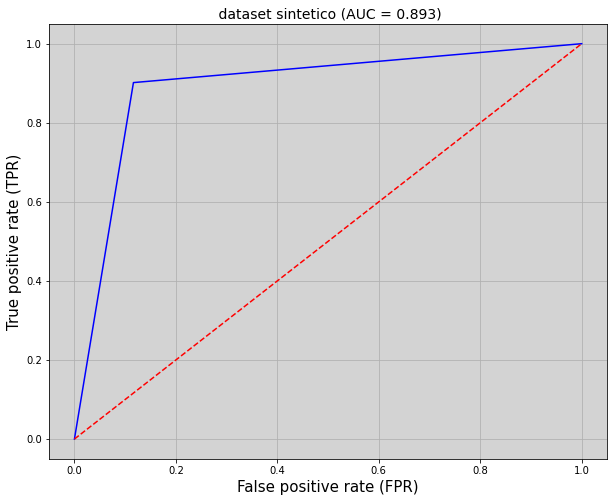

In [87]:
## Plot Curva ROC:

plt.figure(figsize=(10,8))
ax = plt.axes()
plt.plot(false_positive_rate, recall, 'b')
plt.plot([0, 1], [0, 1], 'r--')
plt.title(u' dataset sintetico (AUC = %0.3f)' % roc_auc, fontsize = 14)
ax.set_facecolor('lightgray')
plt.xlabel('False positive rate (FPR)', fontsize = 15)
plt.ylabel('True positive rate (TPR)', fontsize = 15)
plt.grid()
plt.show()

## **EXPERIMENTO #2 DATASETS: IRIS - WINE - DIABETES** 
----

In [ ]:
from sklearn import tree
from sklearn import datasets
import sklearn.metrics as metrics
from sklearn.model_selection import KFold, cross_val_predict

In [ ]:
# Visualizacion de modelo de tipo arbol.
def mostrar_modelo_arbol(modelo, datos, nombre_archivo = "modelo"):
    dot_data = tree.export_graphviz(modelo, out_file=None, feature_names=datos.feature_names,
                         class_names=datos.target_names, filled=True,
                         rounded=True, special_characters=True)

    graph = graphviz.Source(dot_data)
    graph.render(nombre_archivo, view=True)


In [90]:
###############################################################################
####### DATASET DIABETES PARA CLASIFICACION ###################################
diabetes = pd.read_csv('/content/diabetes.csv')
diabetes.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [91]:
# Inicializaciones
class color:
    BOLD = "\033[1m"
    END = "\033[0m"
    
seed = 42

In [92]:
################################################################################
########## Función para obtener las metricas del dataset ######################

def metricas_ds(data, target, alg, name_ds):

    ## 1. Selecciona el algoritmo de aprendizaje:
    if alg == "CART":
        alg = tree.DecisionTreeClassifier() 
    else:
        alg = LogisticRegression(solver='sag',                       
                                 max_iter=10000, random_state=seed,                       
                                 multi_class='ovr')

    ## 2. Métricas de evaluación:
    metricas = {
        'ACC':    metrics.accuracy_score,
        'AUC':    lambda y, y_pred:
                      metrics.auc(y, y_pred), 
        'PREC':   lambda y, y_pred:
                      metrics.precision_score(y, y_pred,
                                              average='micro'),
        'RECALL': lambda y, y_pred:
                      metrics.recall_score(y, y_pred,
                                           average='micro'),
        'F1':     lambda y, y_pred:
                      metrics.f1_score(y, y_pred, 
                                       average='micro')
    }

    ## 3. Validación leave-one-out y obtención de las predicciones:
    y_pred = cross_val_predict(alg, data, target,          
                               cv = KFold(len(data), random_state=seed)) 

    ## 4. Métricas de evaluación:
    ACC = metricas['ACC'](target, y_pred) 
    AUC = metricas['AUC'](target, y_pred) 
    PREC = metricas['PREC'](target, y_pred) 
    RECALL = metricas['RECALL'](target, y_pred)
    F1 = metricas['F1'](target, y_pred)
    
    # Muestra los datos
    print("%-15s %8.3f %8.3f %8.3f %8.3f %8.3f" 
          % (name_ds, ACC, AUC, PREC, RECALL, F1))
    
###############################################################################
######### Funcion para cargar dataset y ver el algoritmo ######################
def algoritmo_ds(alg):

    print('')
    print(color.BOLD + "Resultados para el algoritmo", alg, color.END + ":\n")
    print("%-15s %8s %8s %8s %8s %8s" 
          % ("Dataset", "ACC", "AUC", "PREC", "RECALL", "F1"))
    print("-" * 60)

    ## DATASET IRIS:
    iris = datasets.load_iris()
    metricas_ds(iris.data, iris.target, alg, "IRIS")

    ## DATASET WINE:
    wine = datasets.load_wine()
    metricas_ds(wine.data, wine.target, alg, "WINE")

    ## DATASET DIABETES CLASIFICACION:
    diabetes = pd.read_csv('/content/diabetes.csv')
    diabetes_clf = diabetes.sort_values('Outcome')
    metricas_ds(diabetes_clf.drop('Outcome',axis=1), diabetes_clf['Outcome'].values, alg, "DIABETES")

## **CLASIFICADORES LOGR Y CART**
----

In [93]:
algoritmo_ds("LOGR")
print('')
algoritmo_ds("CART")


Resultados para el algoritmo LOGR :

Dataset              ACC      AUC     PREC   RECALL       F1
------------------------------------------------------------
IRIS               0.940    2.000    0.940    0.940    0.940
WINE               0.927    1.500    0.927    0.927    0.927
DIABETES           0.715    0.000    0.715    0.715    0.715


Resultados para el algoritmo CART :

Dataset              ACC      AUC     PREC   RECALL       F1
------------------------------------------------------------
IRIS               0.960    2.000    0.960    0.960    0.960
WINE               0.876    2.000    0.876    0.876    0.876
DIABETES           0.706    0.500    0.706    0.706    0.706


<img src= 'https://static4.abc.es/media/bienestar/2019/11/28/dar-gracias-6-k2EB--1024x512@abc.jpg'
width=80% height=60% >